# Example

In [1]:
# import libraries
import gym
import gym_trading
import numpy as np

--------------------------------------------------------
Cripto currency: BTC
Initial amount: 100 USD
Number of samples: 5000 (208 trading days)
Initial date: 2019-09-06 04-AM	Last date: 2020-04-01 11-AM
Fees >> buy: -0.25 %	sell: -0.25 %
Min/max relatives order: 100
Max profit (with this configurations): 371.69 %
--------------------------------------------------------

Number of actions: 2


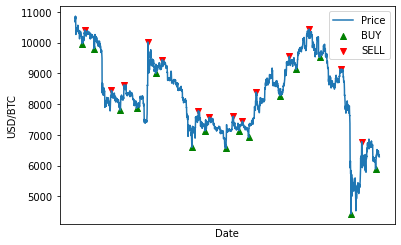

In [2]:
# creating environment
env = gym.make('trading-v0',
               cripto_currency='BTC', mode_random=False,
               n_samples=5000,
               buy_fee=0.25, sell_fee=0.25,
               order=100)

print('Number of actions:', env.action_space.n)

In [3]:
# resetting environement
observation = env.reset()

In [4]:
# simulating a trading session
tot_reward = 0
done = False
while not done:
    
    # random action [BUY, SELL]
    action = np.random.randint(2)
    observation, reward, done, _ = env.step(action)
    tot_reward += reward

print(f'Profit: {round(env.get_profit(), 2)} %')
print(f'Reward: {round(tot_reward, 2)}')

Profit: -99.82 %
Reward: -107137.15


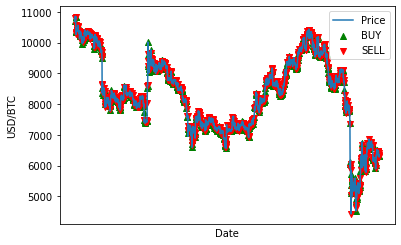

In [5]:
env.render()